![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [5]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [6]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [7]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [9]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [10]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7812262183677007

In [11]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [12]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.143030,0.101960,0.024454,0.029938,0.354552,0.138830,0.030787,0.490140,0.073159,0.101339,...,0.025069,0.063208,0.000000,0.362818,0.056648,0.008970,0.017522,0.202605,0.033989,0.018117
4,0.122624,0.085786,0.024213,0.084795,0.370949,0.216657,0.080359,0.515684,0.062976,0.067019,...,0.024734,0.060935,0.000477,0.149703,0.058190,0.014248,0.020099,0.204794,0.030438,0.018506
5,0.151364,0.110284,0.013762,0.075334,0.304837,0.448736,0.021010,0.611544,0.081741,0.169121,...,0.044538,0.261372,0.000000,0.335987,0.128505,0.001016,0.048658,0.423242,0.052693,0.025351
6,0.154448,0.125772,0.020991,0.064124,0.340779,0.140892,0.009133,0.632038,0.068287,0.063631,...,0.131074,0.088418,0.000000,0.197224,0.132208,0.001432,0.039743,0.269385,0.077607,0.017862
7,0.175143,0.210069,0.035476,0.032505,0.313850,0.243150,0.021793,0.427885,0.079781,0.143879,...,0.023859,0.090359,0.000048,0.205117,0.241663,0.002634,0.018403,0.259465,0.021569,0.017585


# PROYECTO :)

In [5]:
pip install torch


  Using cached torch-2.3.0-cp311-cp311-win_amd64.whl.metadata (26 kB)
Using cached torch-2.3.0-cp311-cp311-win_amd64.whl (159.8 MB)


In [4]:
import torch
print(torch.__version__)
print("CUDA Available: ", torch.cuda.is_available())



ModuleNotFoundError: No module named 'torch'

In [8]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np
from tqdm import tqdm

In [9]:
# Cargar los datos de entrenamiento y prueba
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

# Convertir las listas de géneros de string a listas reales
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

# Binarizar las etiquetas de géneros
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Crear una nueva columna que combine el título y la sinopsis
dataTraining['title_plot'] = dataTraining.apply(lambda row: f"{row['title']} {row['plot']}", axis=1)
dataTesting['title_plot'] = dataTesting.apply(lambda row: f"{row['title']} {row['plot']}", axis=1)

### NO CORRER LAS SIGUIENTES 2 CELDAS (TARDA 40 MINUTOS)

In [20]:
# Cargar el tokenizer y el modelo DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Función para generar embeddings
def generate_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state
    sentence_embedding = torch.mean(embeddings, dim=1)
    return sentence_embedding.detach().numpy()

# Aplicar la función para generar embeddings de la columna 'title_plot' con progreso
dataTraining['embeddings'] = [generate_embeddings(text) for text in tqdm(dataTraining['title_plot'])]
dataTesting['embeddings'] = [generate_embeddings(text) for text in tqdm(dataTesting['title_plot'])]

100%|██████████| 3383/3383 [10:34<00:00,  5.33it/s]


In [10]:
# Ruta para guardar los embeddings
train_embeddings_path = 'train_embeddings.pkl'
test_embeddings_path = 'test_embeddings.pkl'
dataTraining[['embeddings']].to_pickle(train_embeddings_path)
dataTesting[['embeddings']].to_pickle(test_embeddings_path)

In [11]:
# Generar o cargar embeddings para el conjunto de entrenamiento
if os.path.exists(train_embeddings_path):
    dataTraining['embeddings'] = pd.read_pickle(train_embeddings_path)
else:
    dataTraining['embeddings'] = [generate_embeddings(text) for text in tqdm(dataTraining['title_plot'])]
    dataTraining[['embeddings']].to_pickle(train_embeddings_path)

# Generar o cargar embeddings para el conjunto de prueba
if os.path.exists(test_embeddings_path):
    dataTesting['embeddings'] = pd.read_pickle(test_embeddings_path)
else:
    dataTesting['embeddings'] = [generate_embeddings(text) for text in tqdm(dataTesting['title_plot'])]
    dataTesting[['embeddings']].to_pickle(test_embeddings_path)

In [23]:
# Extraer la variable año
X_train_year = dataTraining['year'].values.reshape(-1, 1)
X_test_year = dataTesting['year'].values.reshape(-1, 1)

# Escalar la variable año
scaler = StandardScaler()
X_train_year_scaled = scaler.fit_transform(X_train_year)
X_test_year_scaled = scaler.transform(X_test_year)

# Concatenar los embeddings y el año escalado en una sola matriz de características
X_train_embeddings = np.vstack(dataTraining['embeddings'].values)
X_test_embeddings = np.vstack(dataTesting['embeddings'].values)

X_train = np.hstack((X_train_embeddings, X_train_year_scaled))
X_test = np.hstack((X_test_embeddings, X_test_year_scaled))

# Guardar las matrices en archivos
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_genres.npy', y_genres)

### CORRER DESDE AQUÍ

In [3]:
# Ejemplo de cómo cargar los datos y crear los conjuntos de entrenamiento y validación
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_genres = np.load('y_genres.npy')

# Crear los conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_genres, test_size=0.33, random_state=42)

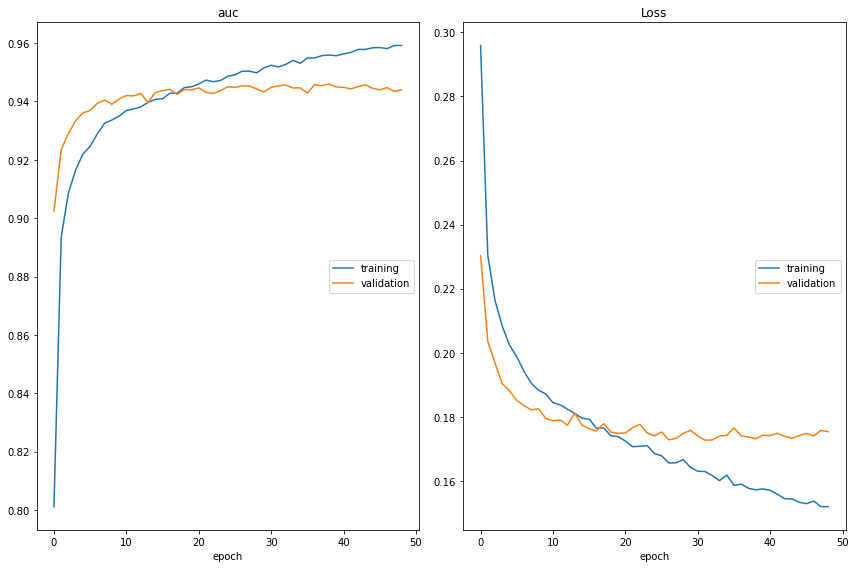

auc
	training         	 (min:    0.801, max:    0.959, cur:    0.959)
	validation       	 (min:    0.902, max:    0.946, cur:    0.944)
Loss
	training         	 (min:    0.152, max:    0.296, cur:    0.152)
	validation       	 (min:    0.173, max:    0.230, cur:    0.175)
82/82 [==============================] - 0s 2ms/step - loss: 0.1732 - auc: 0.9459
Loss: 0.1731754094362259, AUC: 0.9459258913993835
82/82 [==============================] - 0s 2ms/step
MCAUC: 0.9233542179887501


In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import AUC
from livelossplot import PlotLossesKeras
from sklearn.metrics import roc_auc_score

# Asumiendo que X_train, X_val, y_train, y_val ya están definidos
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_genres, test_size=0.33, random_state=42)

# Definir el modelo
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Usar 'sigmoid' para multilabel

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC(name='auc')])

# Definir early stopping, checkpoint y plot losses
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', save_best_only=True, mode='max')
plot_losses = PlotLossesKeras()

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint, plot_losses]
)

# Cargar el mejor modelo
model.load_weights('best_model.h5')

# Evaluar el modelo en el conjunto de validación
loss, auc = model.evaluate(X_val, y_val)
print(f'Loss: {loss}, AUC: {auc}')

# Predicción del conjunto de prueba
y_pred_test_genres = model.predict(X_test)

# Preparar las columnas de salida
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de Kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_nn.csv', index_label='ID')
res.head()

# Calcular el MCAUC en el conjunto de validación
def mauc_score(y_true, y_pred):
    auc_scores = []
    for i in range(y_true.shape[1]):
        auc = roc_auc_score(y_true[:, i], y_pred[:, i])
        auc_scores.append(auc)
    return np.mean(auc_scores)

# Calcular MCAUC en el conjunto de validación
y_pred_val = model.predict(X_val)
mauc = mauc_score(y_val, y_pred_val)
print(f'MCAUC: {mauc}')

In [4]:
import numpy as np
import pandas as pd
import os
import shutil
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import AUC
from kerastuner.tuners import Hyperband
from kerastuner import Objective
from keras.callbacks import EarlyStopping, Callback
from sklearn.metrics import roc_auc_score
import tensorflow as tf

class SearchProgressCallback(Callback):
    def on_trial_end(self, trial):
        tuner = self.tuner
        trials = tuner.oracle.get_best_trials()
        print(f"Completed trial {len(trials)}")
        for i, trial in enumerate(trials):
            print(f"Trial {i+1} | Score: {trial.score}")

# Ruta completa del directorio, usando una ruta diferente
base_dir = r'C:\Temp\tuning_dir'
project_name = 'movie_genre_classification'
project_directory = os.path.join(base_dir, project_name)

# Verificar y eliminar cualquier archivo o directorio conflictivo
if os.path.exists(project_directory):
    if os.path.isfile(project_directory):
        os.remove(project_directory)
    elif os.path.isdir(project_directory):
        shutil.rmtree(project_directory)

# Crear directorios si no existen
os.makedirs(project_directory, exist_ok=True)
print(f"Directorio creado: {project_directory}, es un directorio: {os.path.isdir(project_directory)}")

# Asumiendo que X_train, X_val, y_train, y_val, y X_test ya están definidos

# Definir la función para construir el modelo
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_dim=X_train.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.5, step=0.1)))
        
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=[AUC(name='auc')]
    )
    return model

# Configurar el tuner usando Hyperband
tuner = Hyperband(
    build_model,
    objective=Objective("val_auc", direction="max"),
    max_epochs=50,
    factor=3,
    executions_per_trial=1,
    directory=base_dir,
    project_name=project_name
)

# Definir early stopping
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# Definir el callback personalizado para mostrar el progreso
progress_callback = SearchProgressCallback()
progress_callback.tuner = tuner

# Realizar la búsqueda de hiperparámetros
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, progress_callback])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Guardar el mejor modelo
best_model.save('best_model.h5')

# Imprimir la arquitectura del mejor modelo
best_model.summary()

# Evaluar el mejor modelo
loss, auc = best_model.evaluate(X_val, y_val)
print(f'Best model - Loss: {loss}, AUC: {auc}')


Trial 90 Complete [00h 00m 35s]
val_auc: 0.9239498376846313

Best val_auc So Far: 0.94842129945755
Total elapsed time: 00h 17m 56s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               246400    
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               164352    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 423064 (1.61 MB)
Trainable params: 423064 (

C:\Users\fcalv\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


82/82 [==============================] - 0s 2ms/step - loss: 0.1695 - auc: 0.9484
Best model - Loss: 0.16946008801460266, AUC: 0.94842129945755
106/106 [==============================] - 0s 2ms/step


NameError: name 'dataTesting' is not defined

In [12]:
# Predicción del conjunto de prueba
y_pred_test_genres = best_model.predict(X_test)

# Preparar las columnas de salida
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de Kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_nn.csv', index_label='ID')
print(res.head())

# Calcular el MCAUC en el conjunto de validación
def mauc_score(y_true, y_pred):
    auc_scores = []
    for i in range(y_true.shape[1]):
        auc = roc_auc_score(y_true[:, i], y_pred[:, i])
        auc_scores.append(auc)
    return np.mean(auc_scores)

# Calcular MCAUC en el conjunto de validación
y_pred_val = best_model.predict(X_val)
mauc = mauc_score(y_val, y_pred_val)
print(f'MCAUC: {mauc}')

106/106 [==============================] - 0s 2ms/step
   p_Action  p_Adventure  p_Animation  p_Biography  p_Comedy   p_Crime  \
1  0.002294     0.006825     0.001100     0.003755  0.033229  0.015960   
4  0.062463     0.011331     0.000213     0.104783  0.113506  0.738516   
5  0.037666     0.002621     0.000303     0.084376  0.064260  0.868853   
6  0.170370     0.233721     0.002138     0.012560  0.285127  0.044806   
7  0.004896     0.005183     0.003219     0.003210  0.071218  0.020117   

   p_Documentary   p_Drama  p_Family  p_Fantasy  ...  p_Musical  p_Mystery  \
1       0.000216  0.890043  0.008473   0.072421  ...   0.004335   0.132106   
4       0.007104  0.934466  0.001199   0.001648  ...   0.003344   0.020973   
5       0.008156  0.874049  0.004429   0.004421  ...   0.000732   0.306177   
6       0.000591  0.608676  0.008172   0.018645  ...   0.011885   0.019706   
7       0.000962  0.170178  0.016984   0.149921  ...   0.007052   0.148419   

     p_News  p_Romance  p_Sci-F

In [13]:
# Guardar el mejor modelo
best_model.save('best_model_final.h5')

# Imprimir la arquitectura del mejor modelo
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               246400    
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               164352    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 423064 (1.61 MB)
Trainable params: 423064 (1.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\fcalv\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
